In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from glob import glob
from random import randint

%matplotlib inline

In [111]:
HOME_DIR = ''
STAGE_1_LABELS = 'stage1_train_labels.csv'
STAGE_1_SOLUTION = 'stage1_solution.csv'
STAGE_1_TEST = 'stage1_test'
STAGE_1_TRAIN = 'stage1_train'
STAGE_2_TEST = 'stage2_test_final'

We are given some desription about the data we will deal with but let's have a quick glance at the images we have got.

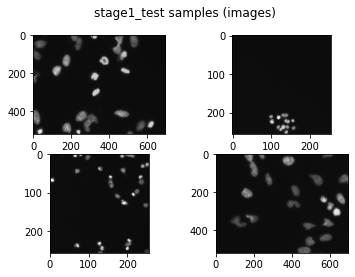

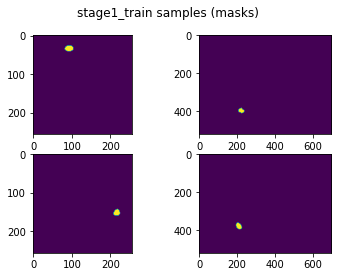

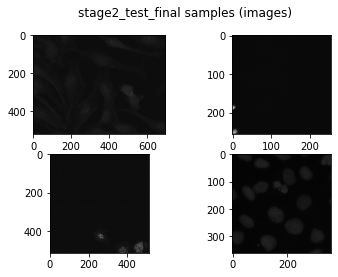

In [112]:
def sample_plots(directory):
    
    sample = []
    for i in range(4):
        subplots = []
        for d in os.listdir(directory):        
            file = os.listdir(os.path.join(directory, d))[0]
            res_dir = os.path.join(directory, d, file)
            im = image.imread(os.path.join(res_dir, os.listdir(res_dir)[0]))
            subplots.append(im)
            sample.append(im)
            if len(subplots)==4:
                break
        fig, axs = plt.subplots(2, 2)
        fig.suptitle(f'{directory} samples ({file})')
        axs[0, 0].imshow(subplots[0])
        axs[1, 0].imshow(subplots[1])
        axs[0, 1].imshow(subplots[2])
        axs[1, 1].imshow(subplots[3])
        break
    return sample

test_1 = sample_plots(STAGE_1_TEST)
train_1 = sample_plots(STAGE_1_TRAIN)
test_2 = sample_plots(STAGE_2_TEST)
    

Okay, we've got some masks, some images. Let's have a closer look at individual image-mask pair.

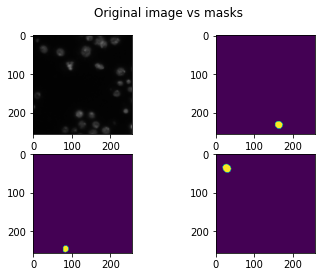

In [113]:
train_set = [os.path.join(STAGE_1_TRAIN, x) for x in  os.listdir(STAGE_1_TRAIN)]
masks = []
for i in range(4):
    test_file = os.path.join(train_set[1], 'masks')
    test_file = os.path.join(test_file, os.listdir(test_file)[i])
    masks.append(test_file)
    
train_file = os.path.join(train_set[1], 'images')
train_file = os.path.join(train_file, os.listdir(train_file)[0])

fig, axs = plt.subplots(2, 2)
fig.suptitle('Original image vs masks')
axs[0, 0].imshow(image.imread(train_file))
axs[1, 0].imshow(image.imread(masks[1]))
axs[0, 1].imshow(image.imread(masks[2]))
axs[1, 1].imshow(image.imread(masks[3]))

plt.show()

Indeed there are several masks corresponding to the particles we see in the image (although I understand why one would like a machine to annotate them as such)

These pictures look interesting and beautiful. But we have no time to waste. Let's build a model to locate these masks.